In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

'''
Visualize SORN:

Components: 
matrix of weights (100 weights)
matrix of neuron activations (100 neurons)

Note:   Each row of the matrix represents a neuron
        Each column is a time step
        Each neuron connects to %90 of other neurons
        Input to neuron is sum of the weights * activation 
        Spiking neuron: activation is all or nothing
        If activation is greater than threshold, neuron fires
        If neuron fires, threshold is increased

'''
size = 100
PwEE = 0.1
randmat = np.random.rand(size)
inputlayer = np.random.rand(size)
weightsEE = np.random.rand(size)
actExc = np.zeros(size)
randarr = np.random.rand(size,size)
arr = np.random.rand(size,size)
arr = ((arr>0.9)*1)*randarr
fig = plt.figure('SORN activation over time',figsize=(10, 6), dpi=100)

# def update(val):
#     amp = samp.val
#     freq = sfreq.val
#     l.set_ydata(amp*np.sin(2*np.pi*freq*t))
#     fig.canvas.draw_idle()
# sfreq.on_changed(update)
# samp.on_changed(update)

# resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# plt.close('all')
ax = plt.subplot(221)
ax.set_ylabel('Neuron #')
ax.set_xlabel('Timestep')
ax.set_title('Random activation')
im = ax.imshow(arr)
copy = arr.copy()

for index,i in enumerate(arr):
    for idx,j in enumerate(i):
        # If neuron activation is greater than threshold (active)
        if j > 0.9:
            # Activate all other neurons in next time step
#             copy[copy[:,idx] != j,idx+1] = 0.25
            if idx+1 < len(arr):
                copy[:,idx+1] += 0.25
            
        # Else inactivate neuron
        elif j <= 0.9:
            copy[index,idx] = 0    

for index,i in enumerate(copy):
    for idx,j in enumerate(i):
        # Reduce activation
        if j > 0.9:
            j /10
        # 
        if j > 0.9 and idx < len(i)-1:
            pass
        
ax2 = plt.subplot(222)
ax2.imshow(copy,interpolation="None")
ax2.set_ylabel('Neuron #')
ax2.set_xlabel('Timestep')

copy2 = arr.copy()>0.8
ax3 = plt.subplot(223)
ax3.set_ylabel('Neuron #')
ax3.set_xlabel('Timestep')
ax3.imshow(copy2,interpolation="None")
copy3 = np.random.rand(100,10)

# copy3[] = np.random.rand(100,1)
ax4 = plt.subplot(224)
ax4.set_ylabel('Neuron #')
ax4.set_xlabel('Possible animation of each neuron over time') # Not yet implemented
plt.xticks([])
ax4.imshow(copy3,interpolation="None")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
fig = plt.figure()
ax = plt.axes(xlim=(0,2),ylim=(-2,2))
line, = ax.plot([],[],lw=2)

def init():
    line.set_data([],[])
    return line

def animate(i):
    x = np.linspace(0,2,1000)
    x = np.linspace(0,2,10)
    y = np.sin
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()



In [ ]:
import numpy as np
arr = np.arange(100).reshape((10,10))

plt.close('all')
fig = plt.figure(figsize=(5,4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

<IPython.core.display.Javascript object>


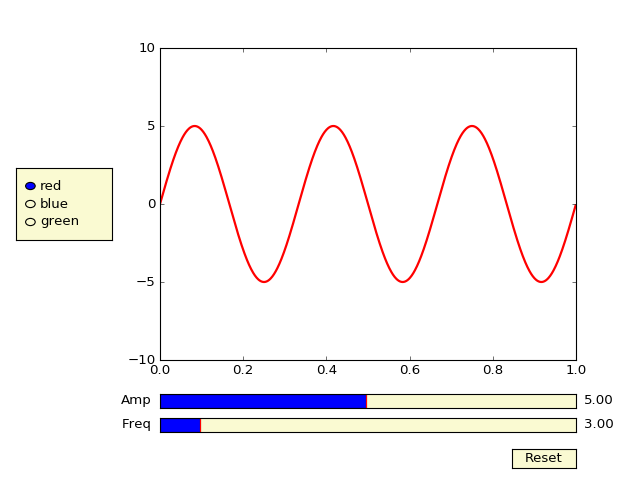

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
    print(freq)
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()


In [ ]:
#!/usr/bin/env python
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('viridis'), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook

r = np.random.rand(100,100)
a = r.copy()
a = (a < 0.2)*1*r*3
plt.ion()
currCol = 1
def generate_data():
    global a
    global currCol
    for r in a:
        for ind,c in enumerate(range(0,currCol)):
            if c > 0.3:
                a[:,currCol+1] += 0.00005
#     for idx,r in enumerate(a):
#         for ind,c in enumerate(r):
#             if c > 0.8:
#                 if ind+1 < len(r):
#                     a[:,ind+1] += 0.01
    currCol+=1
    return a

def update(data):
    mat.set_data(data)
    print("yes")
    return mat

def data_gen():
    while True:
        yield generate_data()

fig, ax = plt.subplots()
mat = ax.matshow(generate_data())
plt.colorbar(mat)
# ani = animation.FuncAnimation(fig,update,data_gen,interval=200,save_count=50)

# plt.show()


<IPython.core.display.Javascript object>


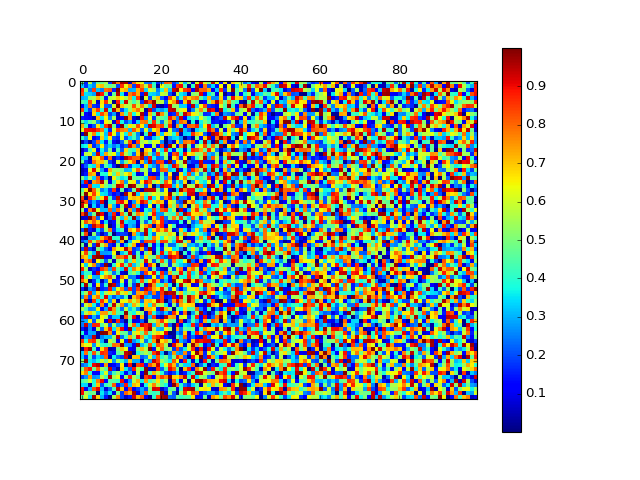

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook
tickCount = 0
wE_hist = np.random.rand(80,80,100)

def generate_data():
    global tickCount
    new = wE_hist[tickCount]
    tickCount += 1
    return new

def update(data):
    mat.set_data(data)
    return mat

def data_gen():
    while True:
        yield generate_data()

fig, ax = plt.subplots()
mat = ax.matshow(generate_data())
plt.colorbar(mat)
ani = animation.FuncAnimation(fig,update,data_gen,interval=200,save_count=50)

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

matrix = np.random.rand(10,10)
def func():
    matrix = np.random.rand(10,10)
    return matrix

im = plt.imshow(func, cmap=plt.get_cmap('viridis'), animated=True)


def updatefig(*args):
    im.set_array(func)
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames = 100,interval=50, blit=True)
plt.show()